In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [9]:
def idealized_kelvin_wave(wn: int = 2, fr: int = 2, Nx: int = 256, Ny: int = 30, Nt: int = 365):
    """
    Generate an idealized Kelvin wave signal in space and time.

    Parameters:
        wn (int): Zonal wavenumber.
        fr (int): Temporal frequency.
        Nx (int): Number of points in the zonal (x) direction.
        Ny (int): Number of points in the meridional (y) direction.
        Nt (int): Number of time steps.

    Returns:
        Tuple[np.ndarray, Tuple[np.ndarray, np.ndarray, np.ndarray]]:
            - signal: 3D array of the Kelvin wave signal over time, latitude, and longitude.
            - grids: Tuple of time, latitude, and longitude arrays.
    """
    x = np.linspace(0, 1, Nx, endpoint=False)
    y = np.linspace(-90, 90, Ny + 1, endpoint=True)[1:-1]
    t = np.linspace(0, 1, Nt, endpoint=False)
    T, Y, X = np.meshgrid(t, y, x, indexing="ij")

    def _get_kelvin_wave(X: np.ndarray, Y: np.ndarray, T: np.ndarray) -> np.ndarray:
        Y_structure = np.exp(-(Y**2) / (2) ** 2)
        X_structure = np.exp(1j * wn * (2 * np.pi) * X)
        T_structure = np.exp(1j * -fr * (2 * np.pi) * T)
        return Y_structure * X_structure * T_structure

    signal = np.real(_get_kelvin_wave(X, Y, T))
    return signal, (t, y, x)


In time-spatial domain: 46720.0
In frequency-wavenumber domain: 46720.000000000015


(0.0, 4.0)

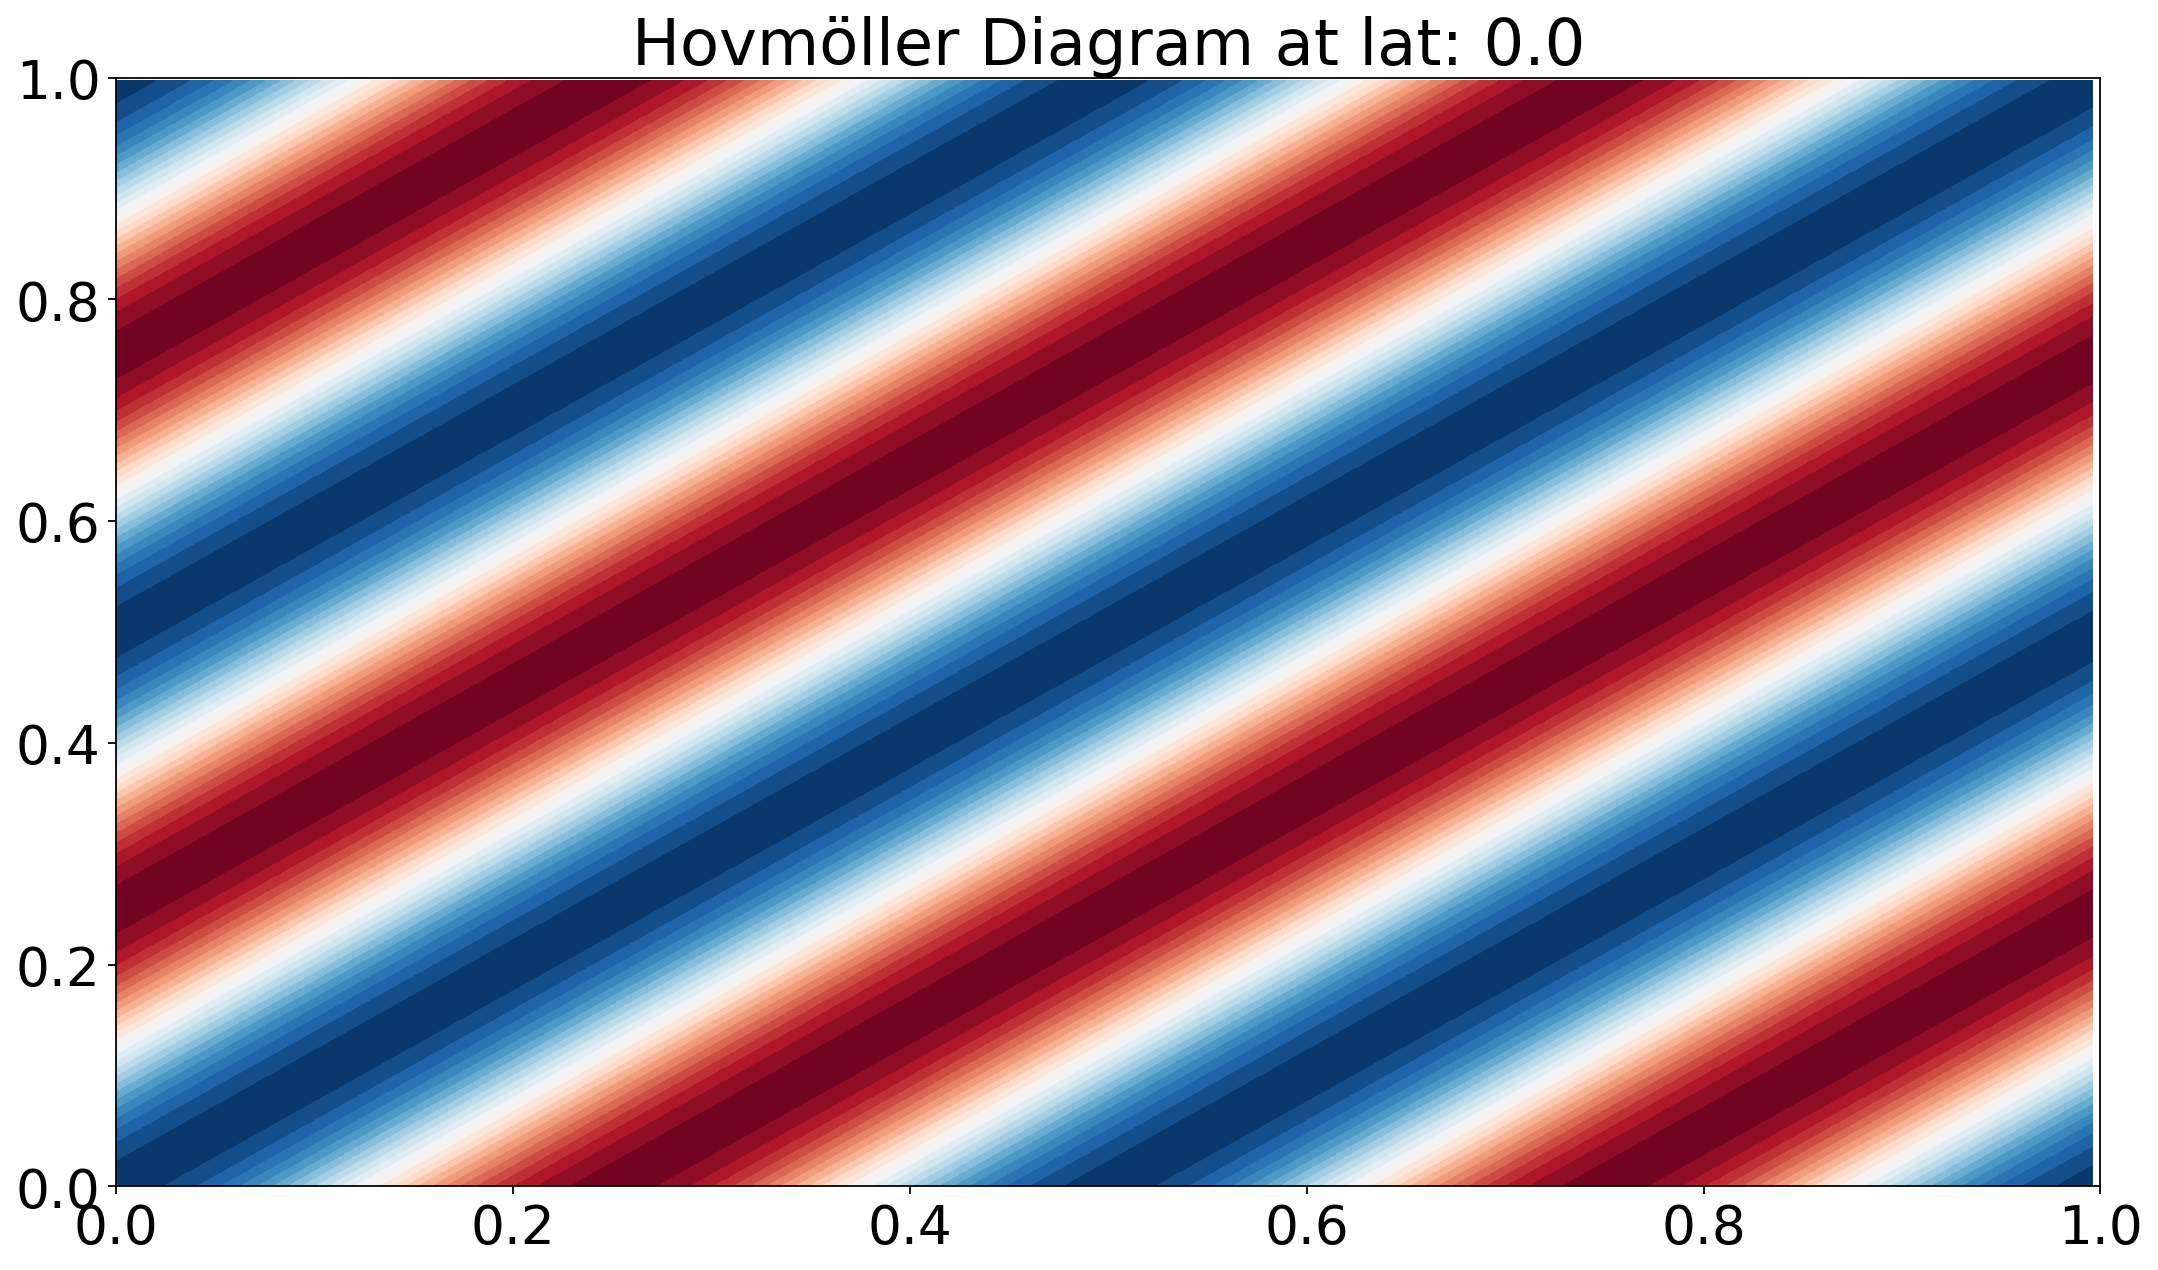

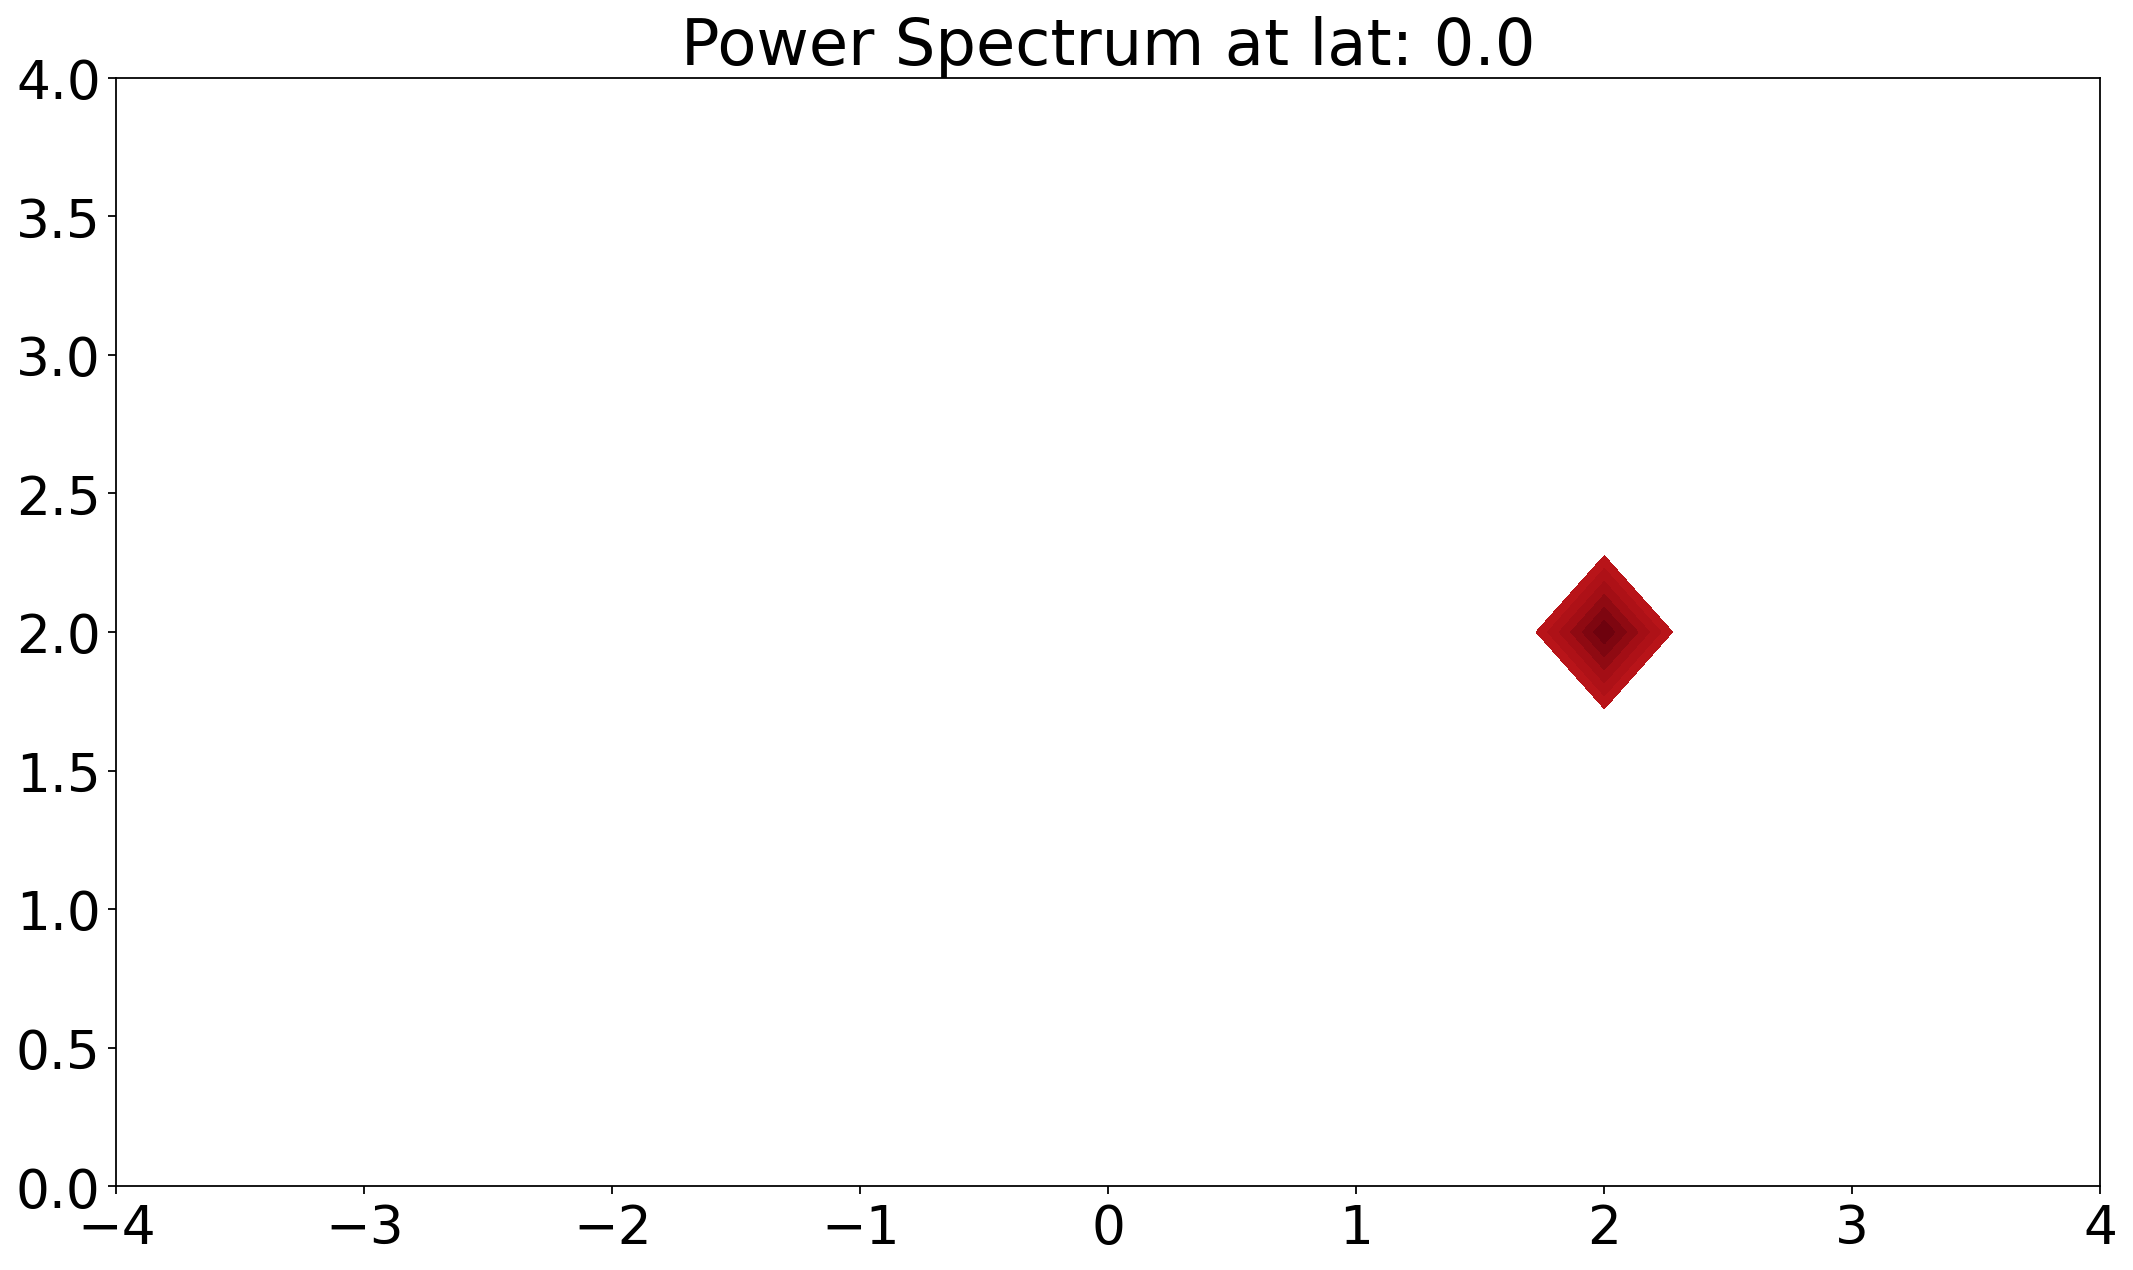

In [13]:
signal, dimensions = idealized_kelvin_wave()
time, lat, lon = dimensions
ilat = len(lat) // 2
signal = signal[:, ilat, :]

# Figure 1: Hovmöller Diagram
plt.rcParams.update({"font.size": 24})
plt.figure(figsize=(16, 9), dpi=160)
plt.contourf(
    lon,
    time,
    signal,
    levels=32,
    cmap="RdBu",
)
plt.xlim(0,1)
plt.ylim(0,1)
plt.title(f"Hovmöller Diagram at lat: {lat[ilat]}")

# Compute Fourier Transform and Power Spectrum
wavenumbers = np.fft.fftshift(np.fft.fftfreq(len(lon), 1 / len(lon)))
frequencies = np.fft.fftshift(np.fft.fftfreq(len(time), 1 / len(time)))
signal_fft = np.fft.fft(signal, axis=-1, norm="ortho")
signal_fft = np.fft.ifft(signal_fft, axis=0, norm="ortho")
signal_fft = np.fft.fftshift(signal_fft)
power_spectrum = np.abs(signal_fft) ** 2

# Print Parseval's theorem validation
print("In time-spatial domain:", np.sum(np.abs(signal) ** 2))
print("In frequency-wavenumber domain:", np.sum(power_spectrum))

# Figure 2: Power Spectrum
# cmap
Reds = plt.get_cmap("Reds", 150)
StepReds = Reds(np.linspace(0, 1, 150))
StepReds[: 15 * 8, :] = np.array([1, 1, 1, 1])
StepReds = ListedColormap(StepReds)
plt.rcParams.update({"font.size": 24})
plt.figure(figsize=(16, 9), dpi=160)
plt.contourf(
    wavenumbers,
    frequencies,
    np.log10(power_spectrum),
    levels=32,
    cmap=StepReds,
)
plt.title(f"Power Spectrum at lat: {lat[ilat]}")
plt.xlim(-4, 4)
plt.ylim(0, 4)
